In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/diabetes.csv')

In [141]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [143]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [144]:
import pandas as pd

missing_values = df.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


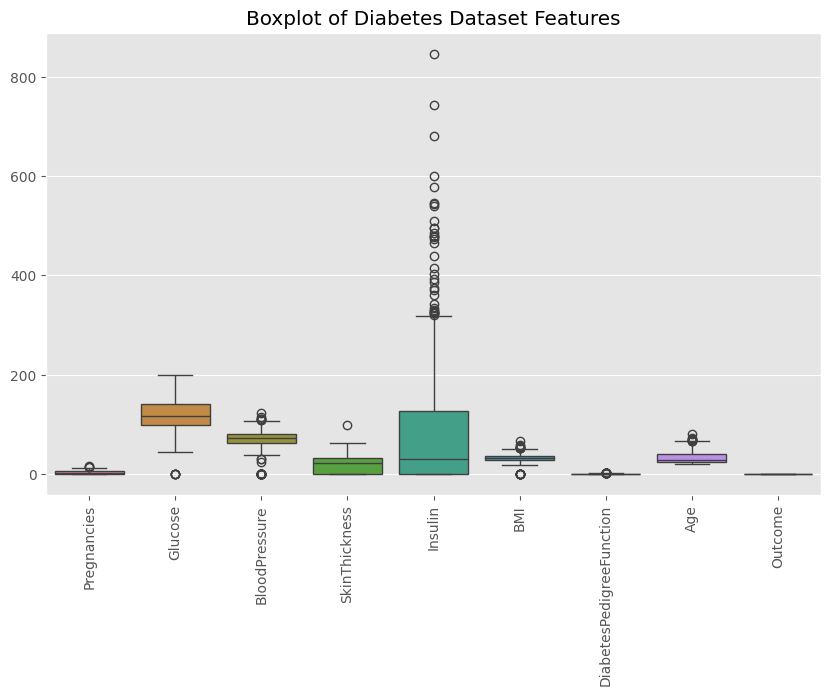

In [145]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.title('Boxplot of Diabetes Dataset Features')
plt.xticks(rotation=90)
plt.show()


In [146]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

for column in df.columns[:-1]:
    df = remove_outliers_iqr(df, column)

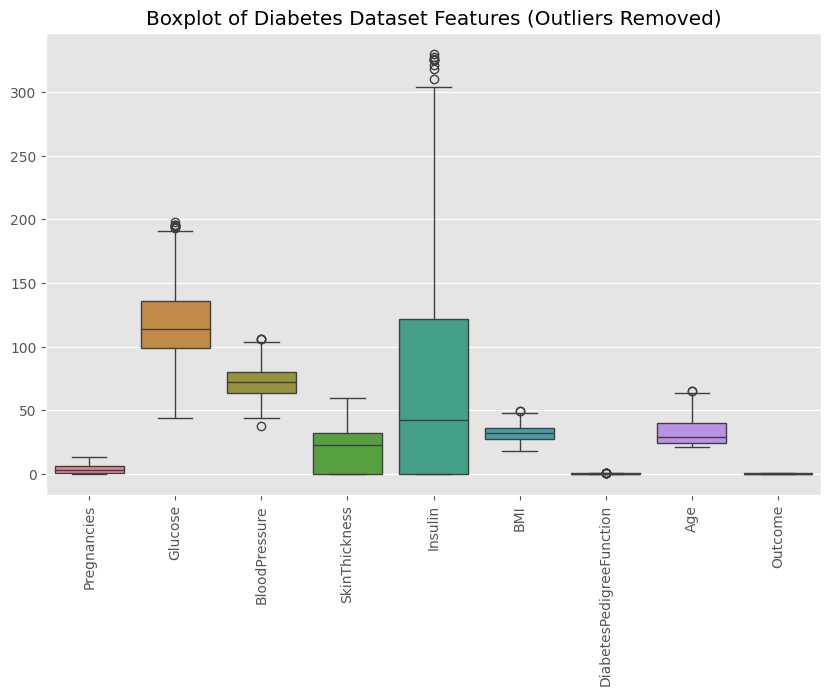

In [147]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.title('Boxplot of Diabetes Dataset Features (Outliers Removed)')
plt.xticks(rotation=90)
plt.show()

In [181]:
#Setup arrays to store training and test accuracies
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)


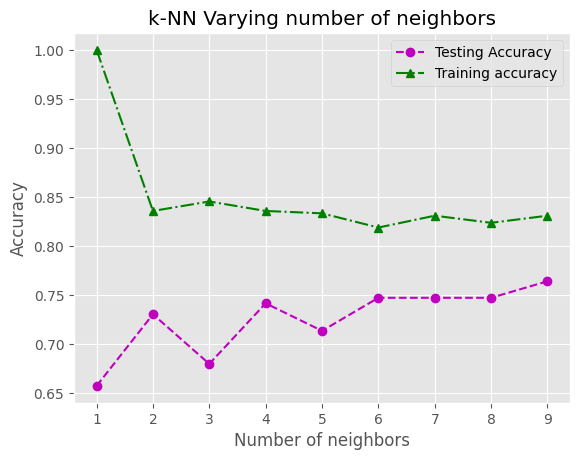

In [182]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy,'o--m', label='Testing Accuracy')
plt.plot(neighbors, train_accuracy,'-.^g', label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
plt.show()

In [183]:
from sklearn import neighbors

In [189]:
# create the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=9)
# fit the model
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [190]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred= knn_model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=knn_model.predict(X_test)))

Train data accuracy: 0.8309178743961353
Test data accuracy: 0.7640449438202247


In [186]:
pip install mlxtend

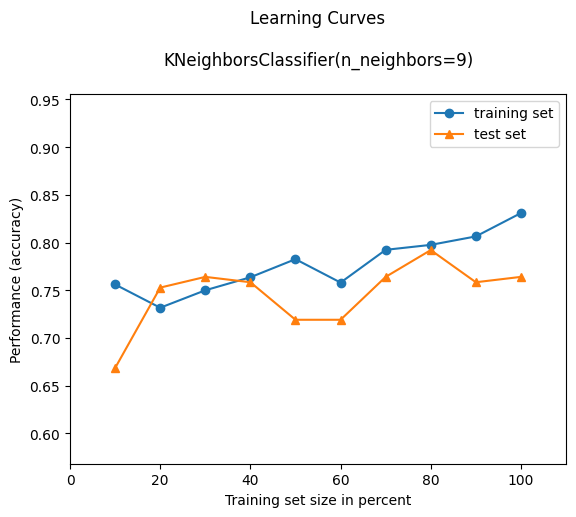

In [191]:
#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
plot_learning_curves(X_train, y_train, X_test, y_test, knn_model,scoring='accuracy')
plt.show()

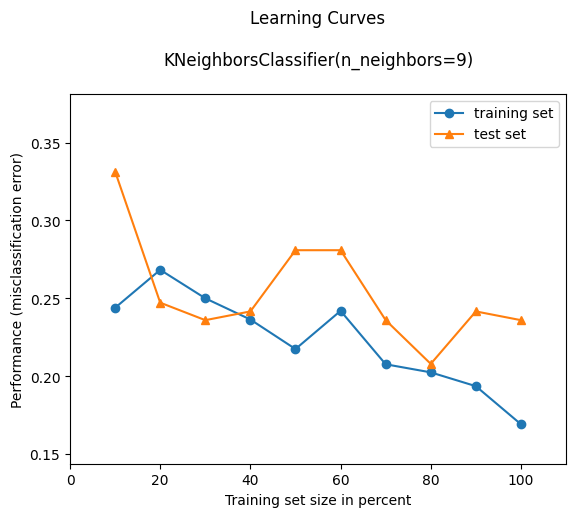

In [192]:
plot_learning_curves(X_train, y_train, X_test, y_test, knn_model,scoring='misclassification error')
plt.show()

In [193]:
from sklearn.metrics import classification_report

y_pred = knn_model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       131
           1       0.60      0.32      0.42        47

    accuracy                           0.76       178
   macro avg       0.70      0.62      0.63       178
weighted avg       0.74      0.76      0.74       178



In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=9)

dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [196]:
models = []
models.append(('C4.5', DecisionTreeClassifier(criterion='entropy',max_depth=3)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=9)))
models.append(('NB', GaussianNB()))


In [197]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression  #https://forest-admin.forest.ku.ac.th/304xxx/?q=system/files/book/5%282018%29%20Logistic%20Regression.pdf
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  #https://www.solutioncenterminitab.com/blog/an-overview-of-discriminant-analysis/
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC #https://guopai.github.io/ml-blog08.html
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10)

In [199]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

C4.5: 0.756388 (0.083873)
KNN: 0.768060 (0.061475)
NB: 0.758827 (0.058189)


In [200]:
sum_results = np.mean(results, axis=1)

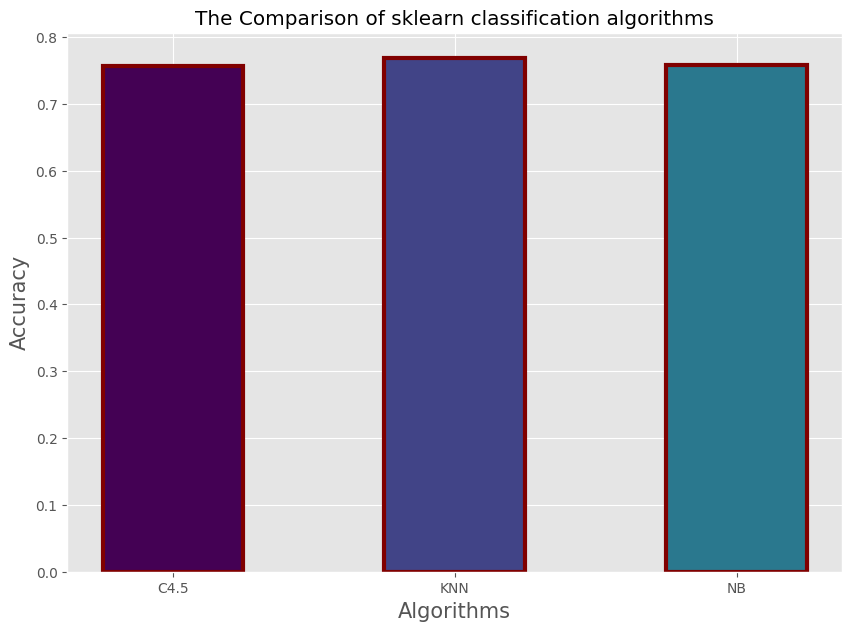

In [201]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10, 7))

#setcolor from colorcoding
col_map = plt.get_cmap('viridis',6)  #tab20  #plasma

plt.bar(names, sum_results,width=0.5, color=col_map.colors,
        edgecolor='maroon', linewidth=3)

plt.xlabel('Algorithms',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('The Comparison of sklearn classification algorithms')
plt.show()

In [202]:
import numpy as np

new_data = np.array([
    [6, 148, 72, 35, 0, 33.6, 0.627, 50],
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],
    [8, 183, 64, 0, 0, 23.3, 0.672, 32]
])

In [203]:
predictions = knn_model.predict(new_data)
for i, prediction in enumerate(predictions):
    print(f"ตัวอย่างที่ {i+1}: ผลการทำนาย = {prediction}")

ตัวอย่างที่ 1: ผลการทำนาย = 1
ตัวอย่างที่ 2: ผลการทำนาย = 0
ตัวอย่างที่ 3: ผลการทำนาย = 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
